In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv("seed_1_test_simulation_final.csv")
df_init = pd.read_csv("seed_1_test_simulation_init.csv")
df_final.head()

,positionX,positionY,positionZ,phaseX,phaseY,phaseZ,myocyte_index,flag,exchange_time
0,8016.429239,2664.521189,220.641713,0.707807,0.172492,1.476847,478,0,0.0
1,8005.530240,605.700047,1149.884665,1.059794,0.210519,-0.894083,-1,0,0.0
2,3107.823095,1956.473887,2755.648009,-0.297096,-0.925051,-1.201917,-1,0,0.0
3,6809.028882,851.114376,1446.906327,0.251273,-0.009241,0.465903,779,0,0.0
4,3529.567302,601.495543,1509.291747,0.199211,-0.054571,-0.083920,112,0,0.0


In [3]:
def get_positions(df):
    positions = df.iloc[:,:3]
    positions = positions.to_numpy()
    return positions

positions_init = get_positions(df_init)
positions_final = get_positions(df_final)

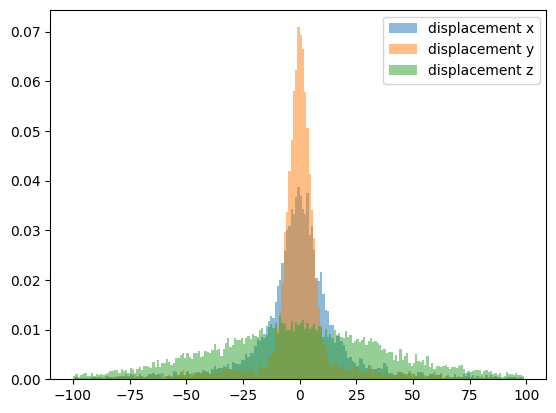

In [24]:
displacements = positions_final - positions_init
plt.hist(displacements[:,0], bins=np.arange(-100,100,1),density=True,label="displacement x",alpha=0.5)
plt.hist(displacements[:,1], bins=np.arange(-100,100,1),density=True,label="displacement y",alpha=0.5)
plt.hist(displacements[:,2], bins=np.arange(-100,100,1),density=True,label="displacement z",alpha=0.5)
plt.legend()
plt.show()

In [37]:
def get_phases(df):
    phases = df.iloc[:,3:6]
    flag = df.iloc[:,7]
    phases = phases.to_numpy()
    flag = flag.to_numpy()
    valid_phases = np.where(flag == 0)[0]
    phases = phases[valid_phases]
    print("Percentage of valid phases: ",len(phases)/len(flag)*100,"%")
    return phases, flag

phases, flag = get_phases(df_final)
print("Flags: ",np.unique(flag))
print("Phases: ",phases.shape)

Percentage of valid phases:  99.85000000000001 %
Flags:  [0 2]
Phases:  (9985, 3)


In [38]:
from scripts.tensor_fitting import process_phase, get_parameters
#The bvalue is given by the sequence of the simulation
bvalue = 0.3
tensor = process_phase(phases, bvalue)
print(tensor)

[[ 0.27508895 -0.00757527  0.14417806]
 [-0.00757527  0.19870824 -0.00287201]
 [ 0.14417806 -0.00287201  0.9520589 ]]


In [42]:
params = get_parameters(tensor, bvalue)
[FA, lambda_mean, lambda1, lambda2, lambda3, eigenvectors, eigenvectors_sorted] = params
print("FA: ",FA)
print("lambda_mean: ",lambda_mean)
print("lambda1: ",lambda1)
print("lambda2: ",lambda2)
print("lambda3: ",lambda3)
print("eigenvectors: ",eigenvectors)

FA:  0.7375404670002413
lambda_mean:  0.47528536276207817
lambda1:  0.9815100737294042
lambda2:  0.24663955116024752
lambda3:  0.1977064633965829
eigenvectors:  [[ 0.20002785 -0.96979421  0.1395996 ]
 [-0.00553038  0.14135928  0.98994291]
 [ 0.9797746   0.19878819 -0.02291247]]
